IMPORTING DATA

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
pf = pd.read_csv("Documents/Visual Studio 2017/imdb_movies_shows.csv")
pf.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


EXPLORING

In [72]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5805 non-null   object 
 1   type                  5806 non-null   object 
 2   release_year          5806 non-null   int64  
 3   age_certification     3196 non-null   object 
 4   runtime               5806 non-null   int64  
 5   genres                5806 non-null   object 
 6   production_countries  5806 non-null   object 
 7   seasons               2047 non-null   float64
 8   imdb_id               5362 non-null   object 
 9   imdb_score            5283 non-null   float64
 10  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 499.1+ KB


There are over 5,000 movies and shows in this dataset
11 columns that contains information about each movies or shows

In [10]:
pf["type"].value_counts()

type
MOVIE    3759
SHOW     2047
Name: count, dtype: int64

In [7]:
#looking at the earliest year of films and the recent
Early_Year = pf["release_year"].min()
Latest_year = pf["release_year"].max()

print("The Oldest Movie:", Early_Year)
print("The Latest Movie:", Latest_year)

The Oldest Movie: 1945
The Latest Movie: 2022


In [9]:
#number of different genres
pf["genres"].nunique()

1626

In [11]:
#number of different production countries
pf["production_countries"].nunique()

449

In [14]:
#the film with the highest runtime

type = pf.groupby("type")
type["runtime"].max()

type
MOVIE    251
SHOW     225
Name: runtime, dtype: int64

In [15]:
#the film with the lowest runtime

types = pf.groupby("type")
types["runtime"].min()

type
MOVIE    3
SHOW     0
Name: runtime, dtype: int64

In [18]:
#Different age certifications

pf["age_certification"].unique()

array(['TV-MA', 'R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

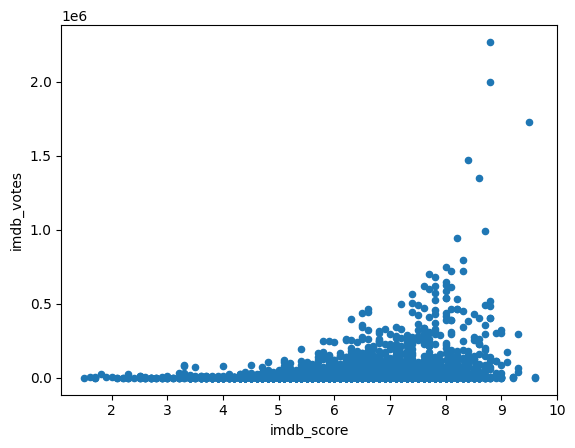

In [73]:
pf.plot(kind='scatter', x="imdb_score", y="imdb_votes");

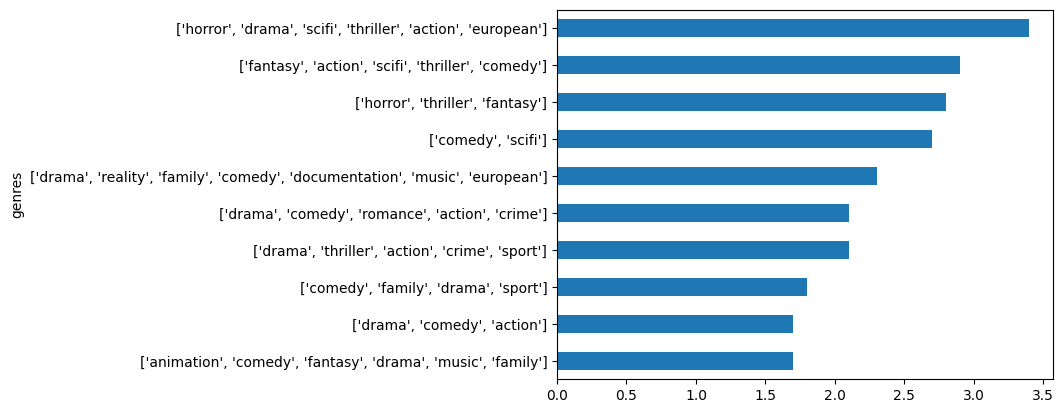

In [29]:
genres = df.groupby("genres")
genres["imdb_score"].mean().sort_values().head(10).plot(kind='barh');

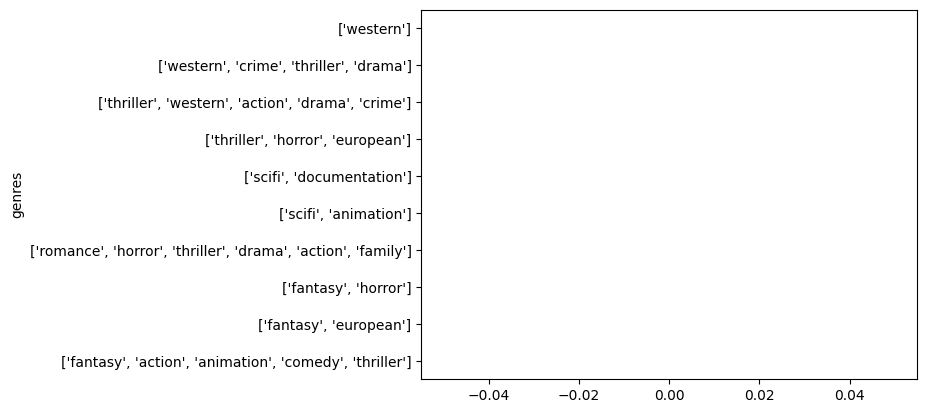

In [30]:
genress = df.groupby("genres")
genress["imdb_score"].mean().sort_values().tail(10).plot(kind='barh');

DATA CLEANING FOR ANALYSIS AND MODEL BUILDING


In [19]:
#checking for null values in each column

pf.isnull().sum()

title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
dtype: int64

In [21]:
round((df.isnull().sum()/len(df) * 100), 0)

title                    0.0
type                     0.0
release_year             0.0
age_certification       45.0
runtime                  0.0
genres                   0.0
production_countries     0.0
seasons                 65.0
imdb_id                  8.0
imdb_score               9.0
imdb_votes               9.0
dtype: float64

seasons has too much null values, over 50%. They have to be dropped

In [74]:
#dropping the age_certification and seasons columns

pf.drop(columns=["seasons"], inplace=True)

In [75]:
pf.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],tt0070047,8.1,391942.0


In [76]:
#checking for categorical columns with high and low cardinality

pf.select_dtypes("object").nunique()

title                   5751
type                       2
age_certification         11
genres                  1626
production_countries     449
imdb_id                 5362
dtype: int64

All the columns has high multicolinearity except for type which is low

Considering the model we want to build, title and imdb_id columns will be dropped

In [77]:
pf.drop(columns=["title", "imdb_id"], inplace=True)

In [78]:
pf.head()

,type,release_year,age_certification,runtime,genres,production_countries,imdb_score,imdb_votes
0,SHOW,1945,TV-MA,48,['documentation'],['US'],NaN,NaN
1,MOVIE,1976,R,113,"['crime', 'drama']",['US'],8.3,795222.0
2,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],8.2,530877.0
3,MOVIE,1979,R,94,['comedy'],['GB'],8.0,392419.0
4,MOVIE,1973,R,133,['horror'],['US'],8.1,391942.0


In [79]:
#check for numeric columns that are multicolineriaty

#correlatiopn between the numeric columns
corr = pf.select_dtypes("number").drop(columns='imdb_score').corr()
corr

,release_year,runtime,imdb_votes
release_year,1.000000,-0.211076,-0.196988
runtime,-0.211076,1.000000,0.138610
imdb_votes,-0.196988,0.138610,1.000000


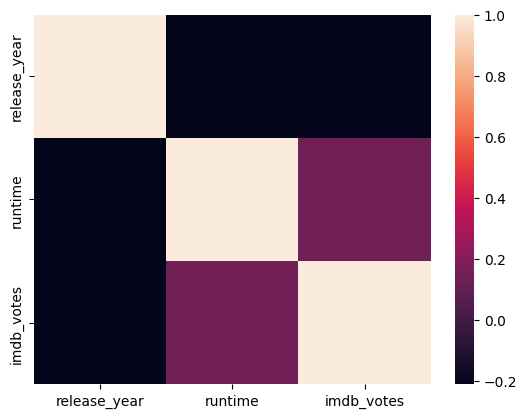

In [38]:
#visualise it with heatmap

sns.heatmap(corr);

#checking for leakages

from the analysis made above, we can see that the highest imdb_votes corresponds with high imdb_score.

In [80]:
#dropping the imdb_votes column as a leakage

pf.drop(columns="imdb_votes", inplace=True)

In [81]:
pf.head()

,type,release_year,age_certification,runtime,genres,production_countries,imdb_score
0,SHOW,1945,TV-MA,48,['documentation'],['US'],NaN
1,MOVIE,1976,R,113,"['crime', 'drama']",['US'],8.3
2,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],8.2
3,MOVIE,1979,R,94,['comedy'],['GB'],8.0
4,MOVIE,1973,R,133,['horror'],['US'],8.1


In [82]:
#dropping the release year column also

pf.drop(columns=["release_year"], inplace=True)

In [83]:
pf.head()

,type,age_certification,runtime,genres,production_countries,imdb_score
0,SHOW,TV-MA,48,['documentation'],['US'],NaN
1,MOVIE,R,113,"['crime', 'drama']",['US'],8.3
2,MOVIE,PG,91,"['comedy', 'fantasy']",['GB'],8.2
3,MOVIE,R,94,['comedy'],['GB'],8.0
4,MOVIE,R,133,['horror'],['US'],8.1


The imdb_score is the target. 

The imdb_score column contains null values which will affect the model building.

In [84]:
#dropping null values in the imdb_score columns

pf.dropna(subset=['imdb_score'], inplace=True)

In [85]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5283 entries, 1 to 5805
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5283 non-null   object 
 1   age_certification     2998 non-null   object 
 2   runtime               5283 non-null   int64  
 3   genres                5283 non-null   object 
 4   production_countries  5283 non-null   object 
 5   imdb_score            5283 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 288.9+ KB


MODEL BUILDING

In [54]:
#importing the neccessary modules

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import OneHotEncoder
from sklearn.linear_model import Ridge

In [86]:
#splitting our data

target = 'imdb_score'
X = pf.drop(columns=target)
y = pf[target]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
#Building the baseline

y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
print('Model Baseline:', round(y_mean, 0))

Model Baseline: 7.0


In [89]:
#calculating the mean absolute error of the baseline

print("Baseline MAE:", round(mean_absolute_error(y_train, y_pred_baseline), 0))

Baseline MAE: 1.0


Building the model

There are categorical columns, OneHotEncoder will be used to code the values in the column.

Also, the age_certification has null values, SimpleImputer will solve that

I will be building a pipeline.

In [90]:
#setting up the model

model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    Ridge()
)

In [91]:
#fitting the training data into the model

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['type', 'age_certification', 'genres',
                                     'production_countries'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [92]:
#training the model

Training = model.predict(X_train)
print(Training)

[6.38186567 7.20760568 6.6895237  ... 6.06983687 6.9646643  8.09392482]


In [93]:
#calculating the mean absolute error of the training data

print("Training MAE:", mean_absolute_error(y_train, Training))

Training MAE: 0.6194886995045065


the mean absolute error of the trainning data beat the one of the baseline.

    This is good.

In [94]:
#testing the model 

Predictions = model.predict(X_test)
print(Predictions)

[6.03844212 6.21104093 6.19122293 ... 7.2214524  8.15575867 5.43368551]


In [95]:
#Checking the mean absolute error for its performance

print("Training MAE:", mean_absolute_error(y_test, Predictions))

Training MAE: 0.8048150889531004
